In [185]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from BCI2kReader import BCI2kReader as b2k
from matplotlib import pyplot
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image as im
import os
from sklearn.preprocessing import normalize #machine learning algorithm library

In [186]:
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

In [190]:
def data_extraction_all(raw, labels):
    combine_dataframe = []
    for i in range(16):
        mean = raw.values[i].mean() #mean setiap channel (channel = index array)
        combine_dataframe.append(float(mean))

        #std = raw.values[i].std()
        #combine_dataframe.append(float(std))

        #snr = signaltonoise(raw.values[i])
        #combine_dataframe.append(float(snr))
        
    combine_dataframe.append(labels)
    #final_dataframe = pd.DataFrame(combine_dataframe, index = ['FP1_mean', 'FP1_std', 'FP1_snr', 'F3_mean', 'F3_std', 'F3_snr', 'F7_mean', 'F7_std', 'F7_snr', 'T3_mean', 'T3_std', 'T3_snr','T5_mean', 'T5_std', 'T5_snr','O1_mean', 'O1_std', 'O1_snr','C4_mean', 'C4_std', 'C4_snr','FP2_mean', 'FP2_std', 'FP2_snr','Fz_mean', 'Fz_std', 'Fz_snr','F4_mean', 'F4_std', 'F4_snr','F8_mean', 'F8_std', 'F8_snr','C3_mean', 'C3_std', 'C3_snr','Cz_mean', 'Cz_std', 'Cz_snr','Pz_mean', 'Pz_std', 'Pz_snr','Oz_mean', 'Oz_std', 'Oz_snr','O2_mean', 'O2_std', 'O2_snr', 'label'])
    final_dataframe = pd.DataFrame(combine_dataframe)
    final_dataframe = pd.DataFrame.transpose(final_dataframe)
    final_dataframe.reset_index()
    return final_dataframe

In [191]:
import glob
import os
df_normal = pd.DataFrame([], )
label = 'NORMAL'
for filename in glob.glob('./dataset - Copy/normal/*.dat'):
    with b2k.BCI2kReader(filename) as test:
        my_states = test.read(-1)
        my_signals, stateslice = test[100:1100]
        raw = pd.DataFrame(my_signals)
        #raw_fix = pd.concat([raw, raw])
        #raw_fix = pd.DataFrame.transpose(raw)
        
        df_normal = df_normal.append(data_extraction_all(raw, label))
        
        #df.append(data_extraction_all(raw))
df_normal.reset_index(drop=True, inplace=True)        

In [192]:
df_normal.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.190277,-1.281654,0.332442,0.257268,-1.567236,-3.767577,-2.474307,1.979274,1.297923,3.437874,2.184666,0.549516,-0.244992,-4.567695,-3.185853,-4.716657,NORMAL
1,-11.918941,-9.858783,-8.571024,-1.528296,-2.429625,-8.039329,-12.792153,1.533807,-9.993291,-11.574882,-18.335855,-6.626202,-10.447767,-9.824265,-8.287059,-9.335996,NORMAL
2,-2.57004,1.597299,-4.280397,-5.684085,-8.986328,-10.679524,1.501434,6.409095,9.640125,8.7615,6.919143,-4.157372,-0.903474,-8.538651,-13.212737,-9.871851,NORMAL
3,35.177765,32.674328,17.386316,20.626585,29.512955,32.534138,37.372601,43.305931,35.745304,38.726063,45.504196,28.21249,34.225983,29.487053,25.98077,34.484406,NORMAL
4,3.744809,-10.203732,23.138443,15.758226,18.065058,9.843767,-5.183608,-12.090541,-5.938119,-3.318942,-18.34721,1.164372,-0.408705,-0.745172,0.654787,7.369956,NORMAL
5,3.859581,6.987717,-18.61322,4.096191,9.766217,11.314974,9.207692,2.683989,9.698963,14.44301,-9.788726,5.048209,11.153604,8.217066,11.668701,12.260424,NORMAL
6,-79.668007,-72.206223,-61.069008,-67.91024,-68.45266,-62.818634,-68.916245,-95.665726,-66.072235,-70.393761,-86.526733,-65.343559,-70.822578,-64.972473,-64.070557,-63.92783,NORMAL
7,16.192869,-232.096786,11.110968,9.428232,50.090733,186.849594,11.298968,16.86224,12.428722,11.360778,17.313614,1.048014,-34.183014,85.927223,178.282303,-65.776031,NORMAL
8,-0.562122,4.016826,3.132195,6.833145,6.531624,7.136316,4.846908,3.882054,0.716265,0.845427,2.850705,6.165951,2.911887,6.785526,4.488363,6.429225,NORMAL


In [193]:
df_epileps = pd.DataFrame([])
label2 = 'AUTISM'
for filename in glob.glob('./dataset - Copy/autism/*.dat'):
    with b2k.BCI2kReader(filename) as test2:
        my_states2 = test2.read(-1)
        my_signals2, stateslice2 = test2[100:1100]
        raw2 = pd.DataFrame(my_signals2)
        df_epileps = df_epileps.append(data_extraction_all(raw2, label2))
df_epileps.reset_index(drop=True, inplace=True) 

In [194]:
df_epileps.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-23.224014,-42.054676,-6.047184,7.780806,1.759296,-7.287654,1.844964,-39.954124,-5.854893,-6.288216,-14.418789,-23.437687,-1.836417,1.990362,-4.754475,24.192299,AUTISM
1,-8.844296,21.007633,2.344518,4.198556,1.804803,11.546007,-5.152653,11.196041,-22.202465,-5.368968,1.027422,-2.338479,3.7851,3.997686,6.584688,2.130018,AUTISM
2,-31.437679,-69.975372,-12.855609,0.701383,-9.360914,-31.544966,-22.595989,-24.869328,-8.931844,-28.676046,-65.275917,-21.972198,-45.760601,-23.05443,-9.225746,-7.909308,AUTISM
3,-8.642998,-56.579624,-7.169085,-4.48371,-3.04458,-2.738109,-7.779354,-2.672109,-15.506237,-7.448199,-0.366663,-2.948913,5.099194,-1.566213,-8.821593,-14.25557,AUTISM
4,34.835526,72.156837,32.811371,20.97711,19.699249,19.210985,12.8931,63.895058,10.458097,17.015099,51.792809,21.076738,42.212345,24.998259,7.395301,5.968644,AUTISM
5,20.404894,67.10762,37.363205,33.531071,31.387129,32.166553,34.666866,32.745075,-2.769691,29.811937,60.153679,24.50234,38.362034,23.794687,37.450817,34.855064,AUTISM
6,79.7491,-214.354965,52.184017,-39.909077,-242.345901,-126.969955,-138.133881,74.322548,-467.877747,-214.164536,179.189026,-214.087875,-130.259964,-213.102844,-213.148895,-213.871719,AUTISM
7,160.60907,-283.013367,-164.117767,-283.023071,-283.401306,-283.404816,-283.384125,-325.583557,-283.323273,-283.303497,-283.339447,-280.473511,12.620016,-283.141571,-283.084686,-283.191559,AUTISM
8,111.624001,49.710709,69.276802,89.347572,33.545921,-4.908751,46.920322,17.923023,41.19136,39.188992,17.587961,49.301868,52.352985,40.411537,32.713097,35.864761,AUTISM
9,278.033508,105.484329,126.109665,108.241356,106.921425,96.808044,88.233154,-202.947067,91.203575,58.49448,47.474068,105.036392,97.004753,92.969978,113.503471,94.977264,AUTISM


Text(0.5, 1.0, 'Autism EEG signal Signature')

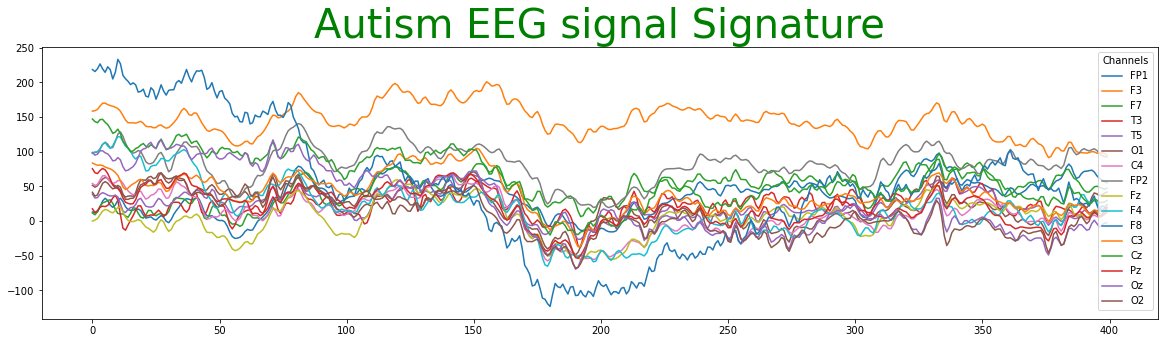

In [195]:
filename3 = "./dataset - Copy/autism/Bader_Autism_24_11_2011S001R09.dat"
with b2k.BCI2kReader(filename3) as test3:
        my_states = test3.read(-1)
        my_signals3, stateslice3 = test3[100:500]
        
plot_autism_eeg = pd.DataFrame(my_signals3)
plot_autism_eeg = pd.DataFrame.transpose(plot_autism_eeg)

plt.figure(figsize = (20,5))
plt.plot(plot_autism_eeg)
plt.legend(['FP1', 'F3', 'F7', 'T3', 'T5', 'O1', 'C4', 'FP2', 'Fz', 'F4', 'F8', 'C3', 'Cz', 'Pz', 'Oz', 'O2',],
            loc='upper right', title='Channels')
plt.title("Autism EEG signal Signature",  fontsize=40, color="green")

Text(0.5, 1.0, 'Normal EEG signal Signature')

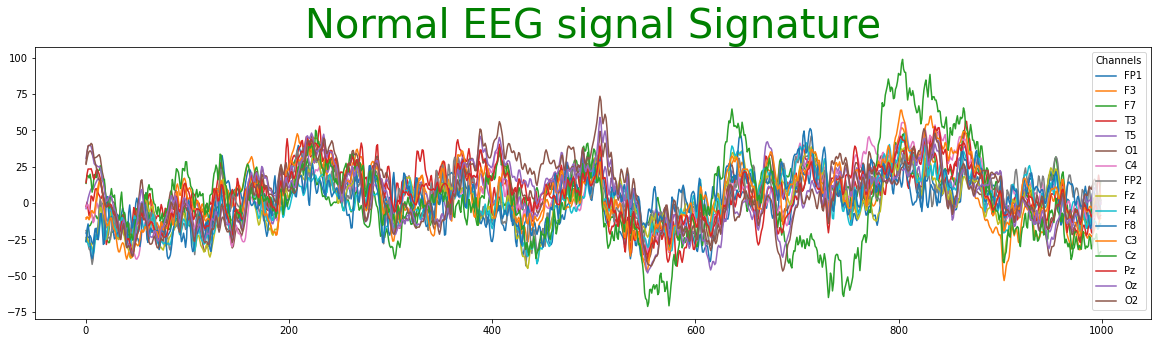

In [196]:
plot_normal_eeg = pd.DataFrame(my_signals)
plot_normal_eeg = pd.DataFrame.transpose(plot_normal_eeg)

plt.figure(figsize = (20,5))
plt.plot(plot_normal_eeg)
plt.legend(['FP1', 'F3', 'F7', 'T3', 'T5', 'O1', 'C4', 'FP2', 'Fz', 'F4', 'F8', 'C3', 'Cz', 'Pz', 'Oz', 'O2',],
            loc='upper right', title='Channels')
plt.title("Normal EEG signal Signature",  fontsize=40, color="green")

In [197]:
raw2.shape

(16, 1000)

In [198]:
plot_autism_eeg.index

RangeIndex(start=0, stop=400, step=1)

In [199]:
all_fixed_eeg_dataset = pd.DataFrame([],)

all_fixed_eeg_dataset = all_fixed_eeg_dataset.append(df_normal)
all_fixed_eeg_dataset = all_fixed_eeg_dataset.append(df_epileps)

In [200]:
all_fixed_eeg_dataset.head(100)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.190277,-1.281654,0.332442,0.257268,-1.567236,-3.767577,-2.474307,1.979274,1.297923,3.437874,2.184666,0.549516,-0.244992,-4.567695,-3.185853,-4.716657,NORMAL
1,-11.918941,-9.858783,-8.571024,-1.528296,-2.429625,-8.039329,-12.792153,1.533807,-9.993291,-11.574882,-18.335855,-6.626202,-10.447767,-9.824265,-8.287059,-9.335996,NORMAL
2,-2.57004,1.597299,-4.280397,-5.684085,-8.986328,-10.679524,1.501434,6.409095,9.640125,8.7615,6.919143,-4.157372,-0.903474,-8.538651,-13.212737,-9.871851,NORMAL
3,35.177765,32.674328,17.386316,20.626585,29.512955,32.534138,37.372601,43.305931,35.745304,38.726063,45.504196,28.21249,34.225983,29.487053,25.98077,34.484406,NORMAL
4,3.744809,-10.203732,23.138443,15.758226,18.065058,9.843767,-5.183608,-12.090541,-5.938119,-3.318942,-18.34721,1.164372,-0.408705,-0.745172,0.654787,7.369956,NORMAL
5,3.859581,6.987717,-18.61322,4.096191,9.766217,11.314974,9.207692,2.683989,9.698963,14.44301,-9.788726,5.048209,11.153604,8.217066,11.668701,12.260424,NORMAL
6,-79.668007,-72.206223,-61.069008,-67.91024,-68.45266,-62.818634,-68.916245,-95.665726,-66.072235,-70.393761,-86.526733,-65.343559,-70.822578,-64.972473,-64.070557,-63.92783,NORMAL
7,16.192869,-232.096786,11.110968,9.428232,50.090733,186.849594,11.298968,16.86224,12.428722,11.360778,17.313614,1.048014,-34.183014,85.927223,178.282303,-65.776031,NORMAL
8,-0.562122,4.016826,3.132195,6.833145,6.531624,7.136316,4.846908,3.882054,0.716265,0.845427,2.850705,6.165951,2.911887,6.785526,4.488363,6.429225,NORMAL
0,-23.224014,-42.054676,-6.047184,7.780806,1.759296,-7.287654,1.844964,-39.954124,-5.854893,-6.288216,-14.418789,-23.437687,-1.836417,1.990362,-4.754475,24.192299,AUTISM


In [209]:
label_mapping = {'NORMAL': 0, 'AUTISM': 1}

In [210]:
from sklearn.model_selection import train_test_split
def preprocess_inputs(df):
    df = df.copy()
    
    df[16] = df[16].replace(label_mapping)
    
    y = df[16].copy()
    X = df.drop(16, axis=1).copy()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
    
    return X_train, X_test, y_train, y_test

In [211]:
X_train, X_test, y_train, y_test = preprocess_inputs(all_fixed_eeg_dataset)

In [217]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

In [218]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
17,3.968019,-0.255683,-17.498711,-18.249397,-8.913531,-10.092358,-19.057796,-7.315770,17.006594,11.655636,-12.477532,-12.813075,-5.384710,-10.213402,-2.750022,-7.938315
4,3.744809,-10.203732,23.138443,15.758226,18.065058,9.843767,-5.183608,-12.090541,-5.938119,-3.318942,-18.347210,1.164372,-0.408705,-0.745172,0.654787,7.369956
3,35.177765,32.674328,17.386316,20.626585,29.512955,32.534138,37.372601,43.305931,35.745304,38.726063,45.504196,28.212490,34.225983,29.487053,25.980770,34.484406
7,160.609070,-283.013367,-164.117767,-283.023071,-283.401306,-283.404816,-283.384125,-325.583557,-283.323273,-283.303497,-283.339447,-280.473511,12.620016,-283.141571,-283.084686,-283.191559
5,20.404894,67.107620,37.363205,33.531071,31.387129,32.166553,34.666866,32.745075,-2.769691,29.811937,60.153679,24.502340,38.362034,23.794687,37.450817,34.855064
9,278.033508,105.484329,126.109665,108.241356,106.921425,96.808044,88.233154,-202.947067,91.203575,58.494480,47.474068,105.036392,97.004753,92.969978,113.503471,94.977264
0,-23.224014,-42.054676,-6.047184,7.780806,1.759296,-7.287654,1.844964,-39.954124,-5.854893,-6.288216,-14.418789,-23.437687,-1.836417,1.990362,-4.754475,24.192299
6,79.749100,-214.354965,52.184017,-39.909077,-242.345901,-126.969955,-138.133881,74.322548,-467.877747,-214.164536,179.189026,-214.087875,-130.259964,-213.102844,-213.148895,-213.871719
13,-1.645699,-5.292356,1.465567,3.629883,8.986127,17.447500,1.543649,11.456279,-2.199035,-0.370468,2.145742,5.014475,5.442616,3.922425,127.102119,60.863373
0,-0.190277,-1.281654,0.332442,0.257268,-1.567236,-3.767577,-2.474307,1.979274,1.297923,3.437874,2.184666,0.549516,-0.244992,-4.567695,-3.185853,-4.716657


In [219]:
y_train

17    1
4     0
3     0
7     1
5     1
9     1
0     1
6     1
13    1
0     0
1     0
1     1
10    1
8     1
6     0
16    1
2     0
4     1
Name: 16, dtype: int64

In [227]:
import tensorflow as tf
inputs = tf.keras.Input(shape=(X_train.shape[1],))

expand_dims = tf.expand_dims(inputs, axis=2)

gru = tf.keras.layers.GRU(256, return_sequences=True)(expand_dims)

flatten = tf.keras.layers.Flatten()(gru)

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(flatten)


model = tf.keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())

Model: "model_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_29 (InputLayer)       [(None, 16)]              0         
                                                                 
 tf.expand_dims_26 (TFOpLamb  (None, 16, 1)            0         
 da)                                                             
                                                                 
 gru_26 (GRU)                (None, 16, 256)           198912    
                                                                 
 flatten_26 (Flatten)        (None, 4096)              0         
                                                                 
 dense_26 (Dense)            (None, 1)                 4097      
                                                                 
Total params: 203,009
Trainable params: 203,009
Non-trainable params: 0
____________________________________________________

In [230]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    validation_data = (X_test,y_test),
    batch_size=32,
    epochs=500,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
   ]
)

Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 2.6124e-05 - accuracy: 1.0000 - val_loss: 10.2312 - val_accuracy: 0.2222
Epoch 2/500
1/1 [==============================] - 0s 65ms/step - loss: 6.9049e-04 - accuracy: 1.0000 - val_loss: 9.2090 - val_accuracy: 0.2222
Epoch 3/500
1/1 [==============================] - 0s 65ms/step - loss: 2.1511e-05 - accuracy: 1.0000 - val_loss: 8.4187 - val_accuracy: 0.2222
Epoch 4/500
1/1 [==============================] - 0s 57ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 9.3880 - val_accuracy: 0.2222
Epoch 5/500
1/1 [==============================] - 0s 56ms/step - loss: 2.9148e-05 - accuracy: 1.0000 - val_loss: 10.1798 - val_accuracy: 0.2222
Epoch 6/500
1/1 [==============================] - 0s 57ms/step - loss: 1.4758e-05 - accuracy: 1.0000 - val_loss: 10.8170 - val_accuracy: 0.2222
Epoch 7/500
1/1 [==============================] - 0s 59ms/step - loss: 1.9720e-04 - accuracy: 1.0000 - val_loss: 11.2904 - val_accuracy: 0

In [231]:
model_acc = model.evaluate(X_test.values.astype(np.float32), y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

Test Accuracy: 22.222%


1/1 [==============================] - 0s 304ms/step


C:\Users\YAP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\YAP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\YAP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


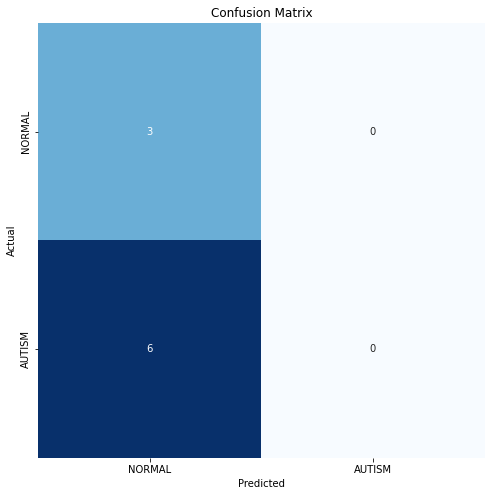

Classification Report:
----------------------
               precision    recall  f1-score   support

      NORMAL       0.33      1.00      0.50         3
      AUTISM       0.00      0.00      0.00         6

    accuracy                           0.33         9
   macro avg       0.17      0.50      0.25         9
weighted avg       0.11      0.33      0.17         9



In [232]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test.values.astype(np.float32)))))

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(2) + 0.5, label_mapping.keys())
plt.yticks(np.arange(2) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

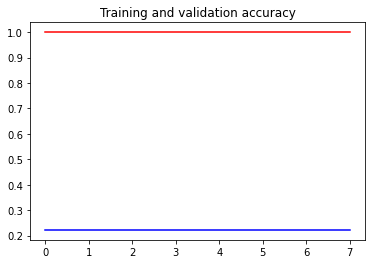

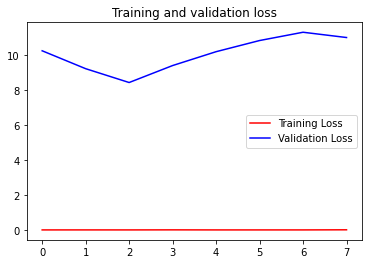

In [233]:
import matplotlib.pyplot as plt

# Plot the model results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [256]:
classes = model.predict(plot_normal_eeg, batch_size=50)
print(classes[0])
if classes[0] > 0.999999:
    print("its Autism")
else:
    print("its Normal")

20/20 [==============================] - 0s 11ms/step
[0.9999998]
its Autism


In [269]:
df_normal = pd.DataFrame([], )
label = 'NORMAL'
for filename in glob.glob('./dataset - Copy/normal/*.dat'):
    with b2k.BCI2kReader(filename) as test:
        my_states = test.read(-1)
        my_signals, stateslice = test[100:1100]
        raw = pd.DataFrame(my_signals)
        classes = model.predict(raw, batch_size=50)
        print(classes[0])
        if classes[0] > 0.99999995:
            print("its Autism\n")
        else:
            print("its Normal\n")

1/1 [==============================] - 0s 219ms/step
[1.000229e-07]
its Normal

1/1 [==============================] - 0s 220ms/step
[0.03961747]
its Normal

1/1 [==============================] - 0s 226ms/step
[0.14335153]
its Normal

1/1 [==============================] - 0s 210ms/step
[0.99999994]
its Normal

1/1 [==============================] - 0s 212ms/step
[0.9999994]
its Normal

1/1 [==============================] - 0s 215ms/step
[1.3901383e-06]
its Normal

1/1 [==============================] - 0s 236ms/step
[8.541848e-06]
its Normal

1/1 [==============================] - 0s 223ms/step
[0.00077485]
its Normal

1/1 [==============================] - 0s 227ms/step
[4.9762493e-05]
its Normal



In [270]:
df_normal = pd.DataFrame([], )
label = 'NORMAL'
for filename in glob.glob('./dataset - Copy/autism/*.dat'):
    with b2k.BCI2kReader(filename) as test:
        my_states = test.read(-1)
        my_signals, stateslice = test[100:1100]
        raw2 = pd.DataFrame(my_signals)
        classes = model.predict(raw2, batch_size=50)
        print(classes[0])
        if classes[0] > 0.99999995:
            print("its Autism\n")
        else:
            print("its Normal\n")

1/1 [==============================] - 0s 222ms/step
[1.6554711e-06]
its Normal

1/1 [==============================] - 0s 215ms/step
[0.07894657]
its Normal

1/1 [==============================] - 0s 211ms/step
[1.]
its Autism

1/1 [==============================] - 0s 223ms/step
[9.996271e-06]
its Normal

1/1 [==============================] - 0s 225ms/step
[0.00017232]
its Normal

1/1 [==============================] - 0s 218ms/step
[1.5706151e-05]
its Normal

1/1 [==============================] - 0s 246ms/step
[1.]
its Autism

1/1 [==============================] - 0s 220ms/step
[1.]
its Autism

1/1 [==============================] - 0s 222ms/step
[1.]
its Autism

1/1 [==============================] - 0s 216ms/step
[1.]
its Autism

1/1 [==============================] - 0s 240ms/step
[3.663962e-09]
its Normal

1/1 [==============================] - 0s 222ms/step
[0.99892354]
its Normal

1/1 [==============================] - 0s 220ms/step
[0.13449156]
its Normal

1/1 [===========